# Capstone Project Covid - 19

## Business Problem

As stated by WHO,COVID-19 is now a pandemic affecting many countries globally. Most people (about 80%) recover from the disease without needing hospital treatment. Around 1 out of every 5 people who gets COVID-19 becomes seriously ill and develops difficulty breathing. Intensive care is needed if someone is seriously ill and requires intensive treatment and close monitoring, or if they're having surgery and intensive care can help them recover. 

Hospitals are taking unprecedented action to increase critical care capacity to cope with the pandemic. Critical care beds are the sum of Intensive care beds, and Intermediate care beds (ICU and IMCU beds). Most people in an ICU (Intensive care unit) have problems with 1 or more organs. For example, they may be unable to breathe on their own. Critical care services rely on complex equipment such as mechanical ventilators that help patients breathe. 

It was reported that the United Kingdom had approximately 8,175 ventilators at the start of the Covid-19 outbreak. As ever, delivering sufficient capacity goes beyond physical infrastructure – such as having more beds and equipment. we will analyse Hospital admissions, beds occupied, discharges from Barts Health NHS Trust, London to predict the Mechanical Ventilation beds required for Covid-19 patients, which helps hospital management for better planning. 

Hospital Admissions & demand for Mechanical Ventilators could have been reduced if more tests are performed at an early stages of Pandemic, assuming people could have self isolated if tested Covid-19 Positive.

## Method Selection

We will apply Multiple Linear Regression method to predict Mechanical Ventilation beds required for Covid-19 patients for the Hospital, Barts Health NHS Trust, London.

Data is collected from https://www.england.nhs.uk/statistics/statistical-work-areas/covid-19-hospital-activity/
We will consider data during period 27th April 2020  to 30th June 2020

Input Variables:

1.Admissions - Number of patients admitted with COVID-19
2.Diagnoses - Total number of inpatients diagnosed with COVID-19 
3.Total beds - occupied by confirmed COVID-19 patients
4. Discharges - Total confirmed COVID-19 cases discharged from hospital (Last 24hrs)

Target Variable:

Mechanical Ventilation beds

## Import Libraries

In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Hospital Data (Barts Health NHS Trust)
### Transformed Data from Source : https://www.england.nhs.uk/statistics/statistical-work-areas/covid-19-hospital-activity/

In [81]:
df=pd.read_excel("https://github.com/Jaswanthjeshu/Capstone_Project_Covid_19/blob/master/Barts_Health_NHS_Trust.xlsx?raw=true")

## First Five Rows

In [82]:
df.head()

,Date,Admissions,Diagnoses,Totalbedsoccupied,Discharges,MechanicalVentilationbeds
0,2020-04-27,8,13,312,22,105
1,2020-04-28,12,6,291,35,108
2,2020-04-29,10,6,277,35,109
3,2020-04-30,14,8,259,37,105
4,2020-05-01,7,7,242,30,100


In [83]:
df_variables = df[['Totalbedsoccupied','Discharges','MechanicalVentilationbeds']]
df_variables.head()

,Totalbedsoccupied,Discharges,MechanicalVentilationbeds
0,312,22,105
1,291,35,108
2,277,35,109
3,259,37,105
4,242,30,100


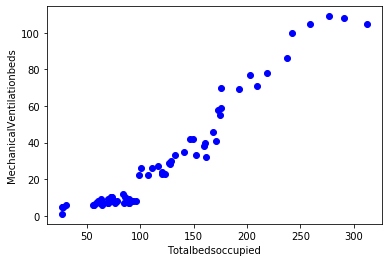

In [84]:
plt.scatter(df_variables.Totalbedsoccupied, df_variables.MechanicalVentilationbeds, color='blue')
plt.xlabel("Totalbedsoccupied")
plt.ylabel("MechanicalVentilationbeds")
plt.show()

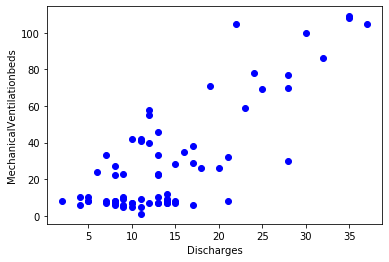

In [85]:
plt.scatter(df_variables.Discharges, df_variables.MechanicalVentilationbeds, color='blue')
plt.xlabel("Discharges")
plt.ylabel("MechanicalVentilationbeds")
plt.show()

## From the above result, we could see there is good correlation between Total beds & Discharges with our target variable, by applying these two variables regression gives the coefficients

In [86]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(df_variables[['Totalbedsoccupied','Discharges']])
y = np.asanyarray(df_variables[['MechanicalVentilationbeds']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[0.37713895 0.68413712]]


In [87]:
regr.intercept_

array([-25.17709102])

### Target Variable(Mechanical Ventilation beds) = -25.17 + 0.38 * Total Beds + 0.68 * Discharges


In [88]:
-25.17 + (0.38 * 259) + (0.68 * 37) #Cheking values for 30th April

98.41

## Train & Test

In [89]:
msk = np.random.rand(len(df)) < 0.8
train = df_variables[msk]
test = df_variables[~msk]

In [90]:
from sklearn import linear_model
regr_new = linear_model.LinearRegression()
x_new = np.asanyarray(train[['Totalbedsoccupied','Discharges']])
y_new = np.asanyarray(train[['MechanicalVentilationbeds']])
regr_new.fit (x_new, y_new)
# The coefficients
print ('Coefficients: ', regr_new.coef_)

Coefficients:  [[0.37189583 0.68176288]]


In [91]:
regr_new.intercept_

array([-24.3163752])

In [92]:
y_hat= regr.predict(test[['Totalbedsoccupied','Discharges']])
x_new = np.asanyarray(test[['Totalbedsoccupied','Discharges']])
y_new = np.asanyarray(test[['MechanicalVentilationbeds']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_new)** 2 ))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr_new.score(x_new, y_new))

Residual sum of squares: 42.37
Variance score: 0.96


### Target Variable(Mechanical Ventilation beds) = -24.31 + 0.38 * Total Beds + 0.68 * Discharges

In [93]:
-24.31 + (0.38 * 259) + (0.64 * 37) #Cheking values for 30th April

97.78999999999999